In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [2]:
reviews_train = load_files("data/aclImdb/train/")

In [3]:
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [7]:
print(text_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 영화리뷰 데이터 가져오기

In [8]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [9]:
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.15, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


## 단어 10000개의 대한 BOW모델 만들기

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                               max_iter=25, random_state = 0)
document_topics = lda.fit_transform(X)

NameError: name 'X' is not defined

## 모델 생성과 변환을 한 번에 한다

In [12]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


## countervectorizer 객체에서 특성 이름을 구한다

In [19]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         comedy        role          funny         
horror        nothing       john          cast          saw           
original      didn          joe           john          10            
effects       minutes       town          performance   book          
game          actually      funny         version       years         
special       actors        new           young         again         
quite         funny         plays         star          thought       
genre         re            role          play          didn          
gore          script        harry         musical       am            
pretty        want          school        played        show          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

## 10개의 토픽을 추출한다 

In [24]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                  max_iter=25, random_state=0)

## 100개의 토픽으로 새로운 모델을 학습하기. 많은 토픽을 사용하면 분석은 더 어려워지지만 데이터에서 특이한 부분을 잘 잡아낼 수 있다.

In [26]:
document_topics100 = lda100.fit_transform(X)

In [27]:
topics = np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])

In [29]:
sorting = np.argsort(lda100.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting = sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
williams      car           camera        effects       frank         family        work          
robin         shot          silent        special       race          father        art           
fox           camera        face          monster       kelly         mother        style         
hood          shots         moment        creature      sinatra       son           music         
andrew        looks         sequence      giant         singer        daughter      cinema        
wolf          director      chaplin       monsters      day           brother       director      
tracy         look          opening       cgi           pat           boy           cinematography
food          sound         facial        creatures     ruth          parents       beautiful     
iron      

## 토픽 몇가지만 추출, 이번에 추출한 토픽이 더 구체적으로 보이지만, 해석하기는 더 어렵습니다.

In [30]:
music = np.argsort(document_topics100[:,45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'This unpleasant film has little to recommend it. Dolph Lundgren gives a performance that is better than either this script or his other action films have allowed.\n'
b"The film chooses to be sci-fi and then it chooses to have melodrama as well? Doesn't work when there is little attention to acting, and the script is poor. There is one scene in particular that goes on too long and you just can't take it seriously, but let's have your viewing ruin it for you!.\n"
b"Secrets and Lies is my favourite movie so I was keen to see this. Unfortunately, it doesn't work on any level - the plot is unbelieveable and contrived, and the characters a little annoying.\n"
b"A dreary, hopelessly predictable film set in a most unpleasant setting (lower Coachella Valley). Acting is as amateurish as any I've seen.\n"
b'A good example of what you get when a successful actor directs his own movie with himself as the star. It works on occasion, but here you get the distinct feeling that some input from the ou

## 토픽 45를 가중치로 정렬

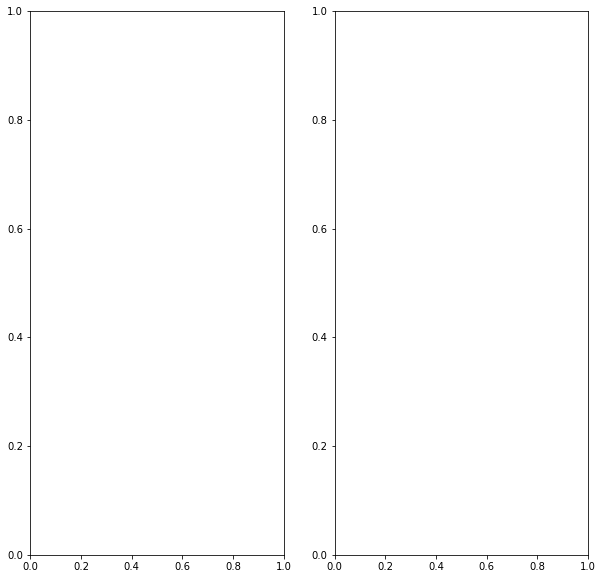

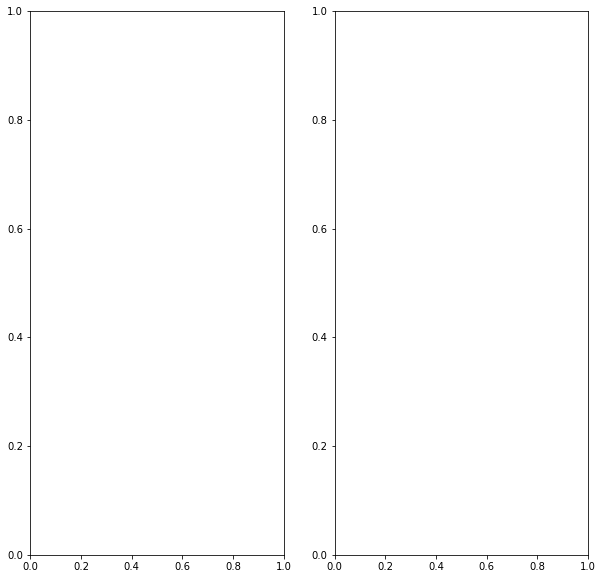

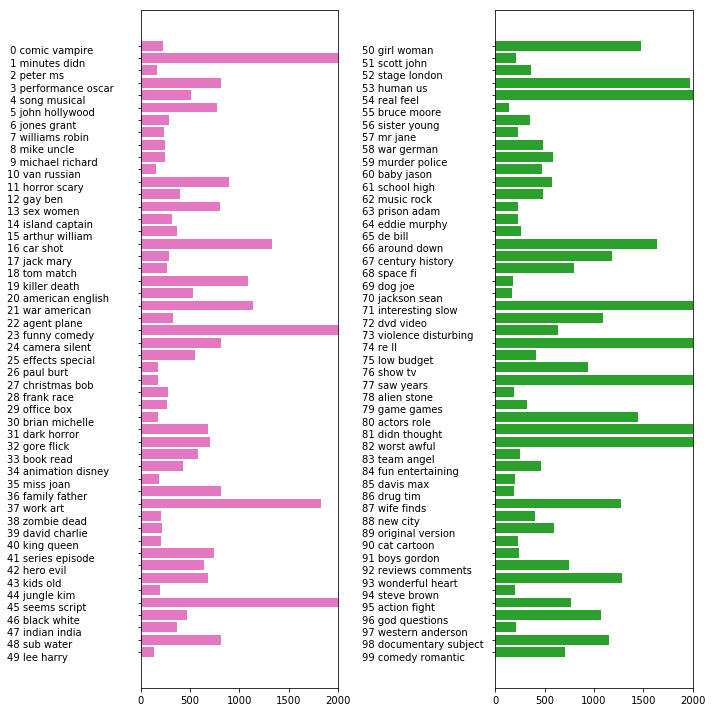

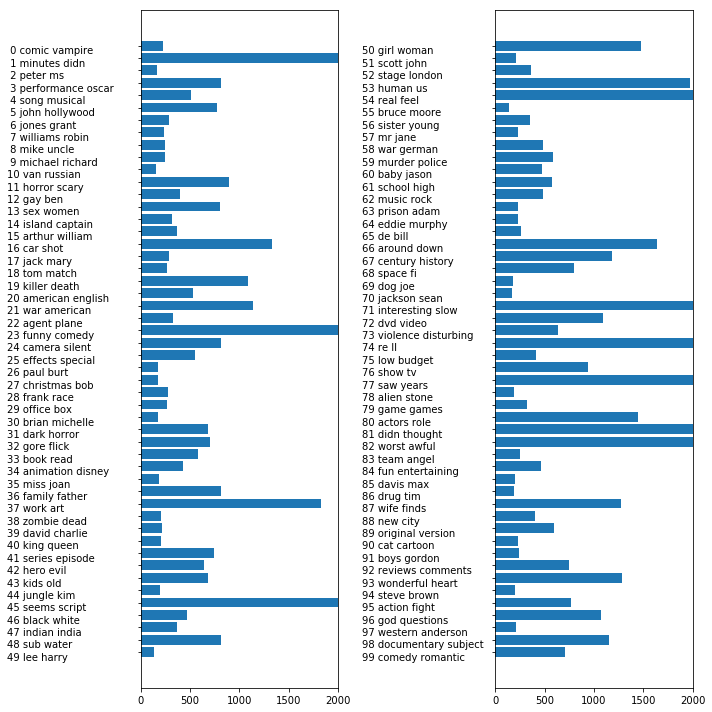

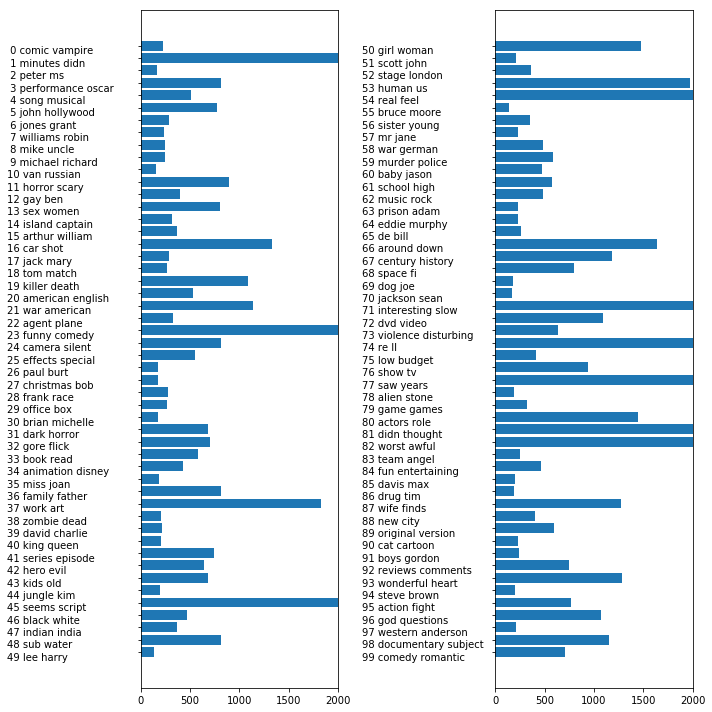

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
topic_name = ["{:>2} ".format(i) + " ".join(words)
             for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0,1]:
    start = col * 50 
    end = (col+1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_name[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
plt.show()